# Linear Models and Neural Nets Lab (Econ 176 '25)

This lab will guide you through a _modeling_ task, inspired by the I&RE module:
+ it's based on a widely-studied French third-party-liability dataset [here on Kaggle](https://www.kaggle.com/datasets/floser/french-motor-claims-datasets-fremtpl2freq)
+ this variation has seven features and is available from [OpenML](https://openml.org/). (It's also widely studied: Cited below.)
+ of the seven features, six are used as predictive features and one is the target (to be predicted from the other six)
+ the target (to be predicted) is the _number of claims filed_ &nbsp; ``claim_nb`` by an individual. We'll call these _claims_ or _incidents_.
+ the features are
  + the ``year`` &nbsp;&nbsp; (there are only years 2018 and 2019)
  + whether the driver lives in a ``town`` <font size="-1">``town == 1.0``</font> or in a more rural area <font size="-1">``town == 0.0``</font>
  + the _driver's_ age (in years) &nbsp;&nbsp; ``driver_age``
  + the car's _weight_ (in kg) &nbsp;&nbsp; ``car_weight``
  + the car's engine _power_ (in hp) &nbsp;&nbsp; ``car_power``
  + the _car's_ age (in years) &nbsp;&nbsp; ``car_age``

<br>

You'll model the
The notebook will guide you through
+ loading the data and inspecting it, a bit
+ modeling the data with linear models (linear regression)

## Loading and inspecting data   

&nbsp;&nbsp; <font color="Coral">there are two tasks here...</font>

In [45]:
# some of the libraries have warnings we want to ignore...
import warnings
warnings.filterwarnings("ignore")

# AI/ML libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

%matplotlib inline

These two cells grab and extract the data - one millon rows and seven features - from OpenML:

In [46]:
# Fetch the insurance-claim dataset from the OpenML repository  (an API call! :)
all = fetch_openml(data_id=45106, as_frame=True)

In [47]:
# Extract the pieces of the API result from the OpenML API call
df_all = all.data
df_all["claim_nb"] = all.target

print("Shape of full data:", df_all.shape)
df_all.head(15)    # print the first five rows of data

Shape of full data: (1000000, 7)


,year,town,driver_age,car_weight,car_power,car_age,claim_nb
0,2018.0,1.0,51.0,1760.0,173.0,3.0,0.0
1,2019.0,1.0,41.0,1760.0,248.0,2.0,0.0
2,2018.0,1.0,25.0,1240.0,111.0,2.0,0.0
3,2019.0,0.0,40.0,1010.0,83.0,9.0,0.0
4,2018.0,0.0,43.0,2180.0,169.0,5.0,0.0
5,2018.0,1.0,45.0,1170.0,149.0,1.0,1.0
6,2019.0,0.0,72.0,1040.0,60.0,2.0,0.0
7,2018.0,-0.0,60.0,1060.0,66.0,2.0,0.0
8,2018.0,1.0,31.0,1400.0,118.0,0.0,0.0
9,2018.0,1.0,19.0,1310.0,78.0,0.0,0.0


Here are the brief descriptions of each of the features:
+ the first six are the features we will use to _make_ predictions
  + the ``year`` &nbsp;&nbsp; (there are only years 2018 and 2019)
  + whether the driver lives in a ``town`` <font size="-1">``town == 1.0``</font> or in a more rural area <font size="-1">``town == 0.0``</font>
  + the _driver's_ age (in years) &nbsp;&nbsp; ``driver_age``
  + the car's _weight_ (in kg) &nbsp;&nbsp; ``car_weight``
  + the car's engine _power_ (in hp) &nbsp;&nbsp; ``car_power``
  + the _car's_ age (in years) &nbsp;&nbsp; ``car_age``
+ the seventh <b><tt>claim_nb</tt></b>, the number of claims files during that year, is the target to _be predicted_

In [48]:
df_all.describe()

,year,town,driver_age,car_weight,car_power,car_age,claim_nb
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2018.550270,0.600130,45.998782,1308.266530,124.981766,4.156266,0.089334
std,0.497467,0.489872,13.997827,285.505998,49.133293,3.545284,0.300652
min,2018.000000,0.000000,18.000000,950.000000,50.000000,0.000000,0.000000
25%,2018.000000,0.000000,35.000000,1090.000000,86.000000,1.000000,0.000000
50%,2019.000000,1.000000,45.000000,1240.000000,116.000000,3.000000,0.000000
75%,2019.000000,1.000000,56.000000,1460.000000,156.000000,6.000000,0.000000
max,2019.000000,1.000000,88.000000,3120.000000,341.000000,23.000000,4.000000


#### <font color="Coral"><b>Task 1</b></font>

With full encouragement to use the built-in Colab AI -- or another of your choice, create five specific visualizations and an additional one:
+ create a histogram of all the drivers' ages, and
+ a histogram of all the the cars' ages, and
+ a histogram of the claim numbers, `claim_nb`
+ create a scatter plot of how the car's age varies with the driver's age
+ create a scatter plot of how the `claim_nb` varies with the driver's age
+ <font color="Coral"><b>also</b></font>, create one more - different - scatter plot of your choice, using this data

<br>

<font color="DodgerBlue">Below for task 2, write a short reflection</font> on the results of these data-visualizations. One sentence on what you see in each is perfect.  <br> <font size="-1">(There's another cell below reminding you of this!)</font>

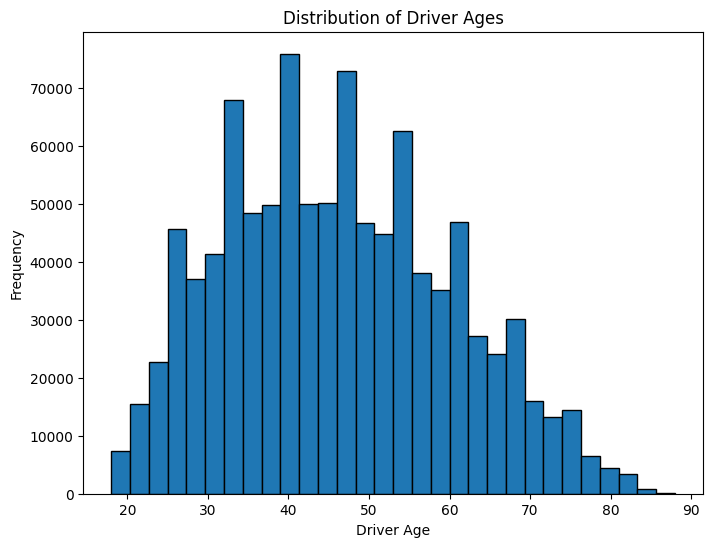

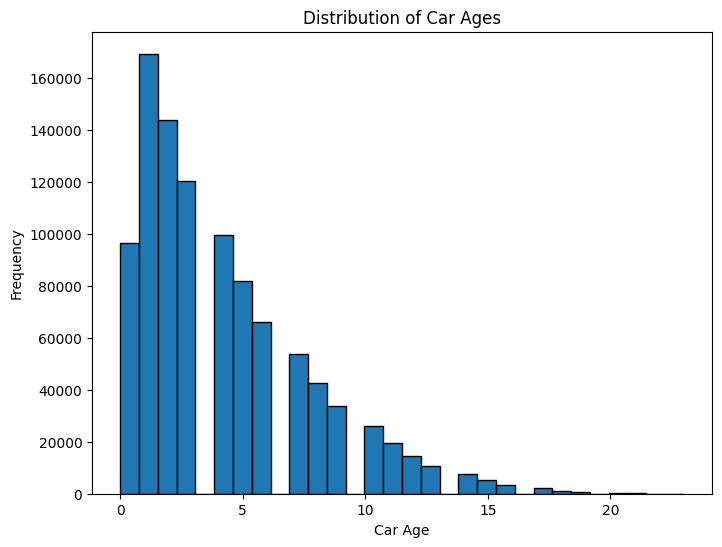

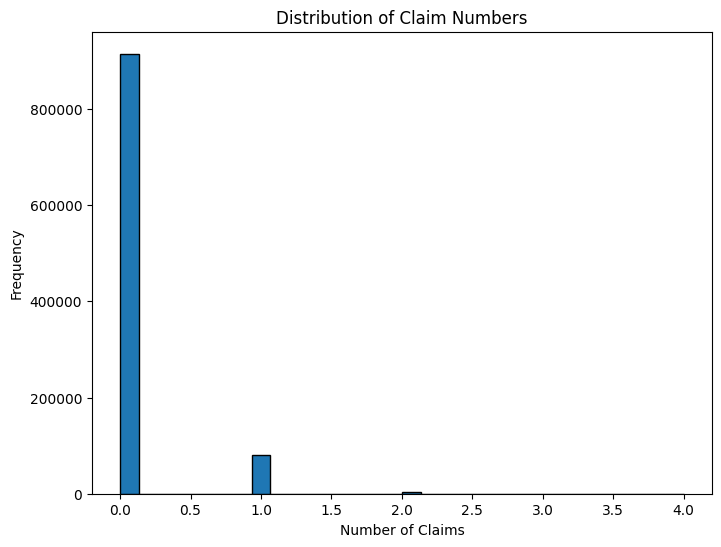

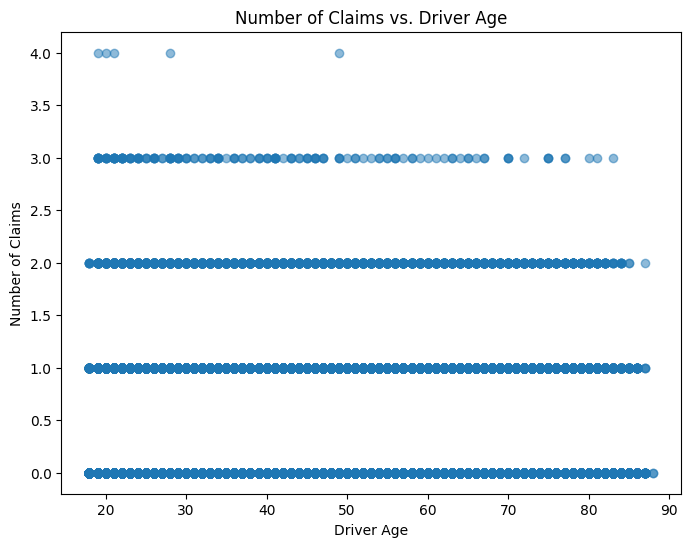

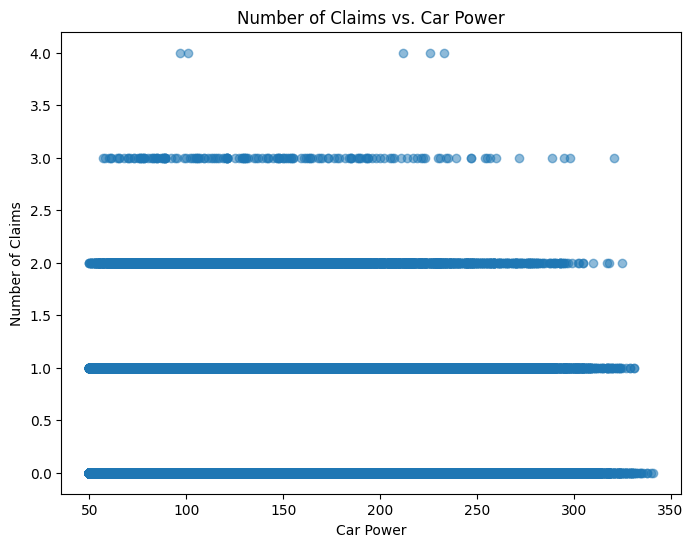

In [49]:
# a histogram of all the drivers' ages

plt.figure(figsize=(8, 6))
plt.hist(df_all['driver_age'], bins=30, edgecolor='black')
plt.xlabel('Driver Age')
plt.ylabel('Frequency')
plt.title('Distribution of Driver Ages')
plt.show()

# a histogram of all the the cars' ages

plt.figure(figsize=(8, 6))
plt.hist(df_all['car_age'], bins=30, edgecolor='black')
plt.xlabel('Car Age')
plt.ylabel('Frequency')
plt.title('Distribution of Car Ages')
plt.show()

# a histogram of the claim numbers, claim_nb

plt.figure(figsize=(8, 6))
plt.hist(df_all['claim_nb'], bins=30, edgecolor='black')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.title('Distribution of Claim Numbers')
plt.show()

# a scatter plot of how the car's age varies with the driver's age

plt.figure(figsize=(8, 6))
plt.scatter(df_all['driver_age'], df_all['car_age'], alpha=0.5)
plt.xlabel('Driver Age')
plt.ylabel('Car Age')
plt.title('Car Age vs. Driver Age')
plt.show()

# a scatter plot of how the claim_nb varies with the driver's age

plt.figure(figsize=(8, 6))
plt.scatter(df_all['driver_age'], df_all['claim_nb'], alpha=0.5)
plt.xlabel('Driver Age')
plt.ylabel('Number of Claims')
plt.title('Number of Claims vs. Driver Age')
plt.show()

# scatter plot of car power vs number of claims
plt.figure(figsize=(8, 6))
plt.scatter(df_all['car_power'], df_all['claim_nb'], alpha=0.5)
plt.xlabel('Car Power')
plt.ylabel('Number of Claims')
plt.title('Number of Claims vs. Car Power')
plt.show()

#### <font color="Coral"><b>Task 2</b></font>

<font color="DodgerBlue">Here, write a short reflection</font> -- a sentence or two for each of these is wonderful -- that describes the data-trends you see in the visualizations above.

As a reminder, they were
+ histograms for the drivers' ages and the cars' ages and the claim numbers, `claim_nb`
+ a scatter plot of how the car's age varies with the driver's age
+ a scatter plot of how the `claim_nb` varies with the driver's age
+ <font color="Coral"><b>and</b></font>, one other - different - scatter plot that visualizes some of this data

<br>
<hr>
<br>

Feel free to use a new cell or the space below:



<br>
<br>
<br>
<br>

Driver ages: The bar graph showed a bell curve with less young drivers and older drivers. Most drivers were in the middle range from around 30 years old to 60 years old.

Car ages: This bar graph showed a decreasing exponential curve with the most cars being within 5 years old and a vast majority of cars being within 10 years old.

Claim numbers: There are only two bars for claim or no claim and majority are no claim which is expected.

Car age vs driver age: The scatter plot seemed to be in a large block. There wasn't too much obvious correlation, it seemed that the distribution had various people driving cars of various ages. It did show that there weren't many young drivers driving very old cars.

Claims vs driver age: It seems that more younger people had a higher number of claims than older people.

Claims vs car power: It seems that less claims were filed for cars of very high power. This might be because there aren't that many cars of high power in the first place.

## Modeling

You will build two models for the <b><tt>claim_nb</tt></b> target:
+ a **linear-regression** model &nbsp;&nbsp; <font size="-2">since the target is a "number of occurrences" over a span of time, we use a _Poisson_ model</font>
+ a **neural-network** model &nbsp;&nbsp;  <font size="-2">of the same sort</font>

You'll experiment with
+ interpreting the models
+ then, building some "deeper" neural networks
+ seeing how the two modeling approaches differ in the relationships they can express

### Part 1: &nbsp;&nbsp; Data splitting

The dataset has a million rows.
+ For speed of training, we will use only 100,000 of them.
+ At the end, you'll try changing at least three model parameters. This is one of those options! 😃

In [50]:
# Let's make sure everything runs first... using only 100,000 rows (instead of 1,000,000)

df_all = df_all.sample(frac=1.0, random_state=42)  # This shuffles the 1,000,000-row dataset

NUMROWS = 100000
df = df_all.iloc[0:NUMROWS,:].copy()    # This uses only the first 100,000 rows (or NUMROWS rows) for speed...

In [51]:
# We split into 90% training data and 10% testing data

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.1, random_state=30)
print("Shape of training data:", train.shape)
print("Shape of test data:", test.shape)

Shape of training data: (90000, 7)
Shape of test data: (10000, 7)


In [52]:
# Define target name (y) and feature names (x)
y, x = df.columns[-1], list(df.columns[:-1])

print("The response name:", y)
print("The feature names:", x)

The response name: claim_nb
The feature names: ['year', 'town', 'driver_age', 'car_weight', 'car_power', 'car_age']


### Part 2: &nbsp; A (Generalized) Linear Model (GLM)

Here, we build a linear-regression model of the data.

We'll use [Glum](https://glum.readthedocs.io/en/latest/), a high-performance implementation in Python. <br> <font size="-2"><tt>glum</tt> stands for _generalized linear modeling" ... not sure about the <tt>u</tt></font>

In Colab, you are likely to need to install `glum` once:

In [ ]:
!pip install glum


We can use that library to build a linear model:

In [ ]:
#
# there's not much code to build our model!
#
from glum import GeneralizedLinearRegressor

glm_model = GeneralizedLinearRegressor(family="poisson", alpha=1e-6)
glm_model.fit(X=train[x], y=train[y])

print("Coefficients")
pd.Series(np.append(glm_model.intercept_, glm_model.coef_), index=["Intercept"] + x)

We did it!  &nbsp;&nbsp; But what _is_ it?!

#### As an absolute model, this is <u>not</u> very useful!

**Everyone** has a very high likelihood of NOT having an auto incident/filing a claim. <i>This is good!</i>

This means _everyone's_ expected number of incidents is 0 &nbsp; (Well, very close to it.)

#### In comparing the ***relative*** impact of a feature, the model <u>is</u> useful.

Here is a full description of the ***relative*** relationships expressed by those coefficients [(cite)](https://ademos.people.uic.edu/Chapter19.html#:~:text=Rather%20than%20odds%20ratios%20(which,variable%5D%20is%20%5Bcoefficient%5D.):


> <font color="DodgerBlue">The expected log count for each unit increase/decrease (depending on the sign of the coefficient) in [outcome variable] given [predictor variable] is [coefficient].</font>


Wow!  &nbsp;&nbsp; This needs some unpacking...

<hr>
<br>





<font size="+1" color="Blue">Interpreting</font> <font size="+1" > coefficients, part one: &nbsp;&nbsp; <tt><b>town</b></tt> example</font>


In practice, it's more straightforward than this suggests:

Suppose your coefficient for `town` is 0.36. &nbsp; <font size="-2">That was one of my test-run values.</font>

This means that "one unit" of `town` increases the <u>log of the claim count</u> by 0.36.  <br> <i><font color="Blue">But log-counts aren't very intuitive!</font></i> &nbsp; Let's _undo_ the log:


`exp(0.36)` is about `1.43` &nbsp;&nbsp;&nbsp; Let's see that this is true:


In [13]:
from math import exp
exp(0.36)

1.4333294145603401

This means that "one unit" of `town` ***multiplies*** &nbsp; the frequency of incidents by 1.43

Since `town` only has values 0 and 1, this means that

**when `town` is 1, the likelihood of an incident is 1.43 times higher then when it's 0**

<br>

<font color="Coral"><b>Aha!</b></font>

<br>

This ***incident-rate ratio*** is really useful!
+ for assessing the threat of an event that is relatively rare and/or
+ the _value_ of small changes to an individual's particular situation.

In theory, the multiplier can be used many times:

In [12]:
exp(0.360105)    # for each unit of "townness,"  we multiply the expected claims by 1.433:

1.433479922050374

In [13]:
exp(0.360105) ** 2   # so, we multiply twice for _two_ units of "townness":

2.054864686921546

This means, if `town == 2`, the expected claims for those individuals would be 2.05x higher:
+ because, as above, `1.433 ** 2 == 1.433*1.433 == 2.05`

There _isn't_ such a value in the dataset...
+ ... but models will allow this kind of extrapolation. Be careful!


<font size="+1" color="Blue">Interpreting</font> <font size="+1"> coefficients, part two: &nbsp;&nbsp; <tt><b>driver_age</b></tt> example</font>

Let's try an example where there are multiple values, for example, for <b><tt>driver_age</tt></b> :
+ My coefficient for <tt><b>driver_age</b></tt> was <tt>-0.003272</tt>
+ And <tt>exp(-0.003272) == 0.9967</tt> &nbsp;&nbsp; <font size="-2">Let's confirm:</font>


In [14]:
exp(-0.003272)    # for each year of driver_age, you multiply the expected claims by 0.9967:

0.9967333471584426

This means that, for this model, the number of claims is multiplied by <tt>0.9967</tt> ***for each additional year of age***

<br>

What if an individual is fifteen years older?

In [15]:
0.9967 ** 15

0.9516272593744175

the model expects the number of claims to be 95% with that "additional experience"

<br>

What if we compare the oldest (88) and youngest (18) in the dataset:


In [16]:
exp(-0.003272)**(88-18)

0.7952967210000054

Which states that our octogenerians will make 0.79 the claims as our 18-year-olds.

Taking the reciprocal, the model is saying that moving across the dataset's full age-span, from old to young, multiplies the number of claims by 1.25:


In [17]:
1/0.7952

1.2575452716297786

There is definitely room for skepticism here! 😀

But we've successfully interpreted the model coefficients!   

Next, try two of your own:

#### <font color="Coral"><b>Task 3</b></font> &nbsp; Two more model-interpretations:  

Following the approach of the two examples above, choose **two more** features from the coefficients and:  
+ compute the _per-unit_ incident-rate multiplier for that feature
+ decide on a "reasonable" number of units (years, kg, hp, ...)
+ compute the incident-rate multiplier for _that many units_
+ find the "full span" of units in the dataset (it's printed above ...)
+ compute the incident-rate multiplier for _that full span_
+ and reflect on what this is saying about the incidents in this data.

Specifically, share how well does these _match your intution_ about these factors for auto incidents/insurance claims? Reasonable? Skeptical? Other?

<br>
<hr>
<br>

Feel free to use this cell or new ones just below:

<br>
<br>

In [14]:
# car_age

exp(-0.022168) # for each additional year of car_age, you multiply the expected claims by 0.978

0.9780759044958746

In [15]:
exp(-0.022168)**10 # the model expects that a car 10 years older has 80% claims of a car 10 years younger

0.801171698262487

In [16]:
exp(-0.022168)**(23-0) # cars at the max age will make 60% less claims than the newest cars

0.6005772517646187

These findings for car_age are indicating that older cars tend to be less prone to making claims. I would have guessed the opposite that older cars would be more accident prone and file more claims. I'm skeptical about these findings and I think that there may be other relationships not being considered.

In [29]:
# car_power

exp(0.004117) # for each additional unit of car power, you multiply the expected claims by 1.004

1.004125486486792

In [31]:
exp(0.004117)**100 # if a car has 100 additional units of power, the chance of it making a claim is 1.51 times more

1.509381553933592

In [33]:
exp(0.004117)**(341-50) # the cars with max hp will be 3.3 times more likely to file a claim than the cars with lowest hp

3.3136390620763057

These findings for car_power indicate that cars with higher power will tend to file more claims. This seems reasonable to me and matches my intuition since cars that have more power and drive faster will be more likely to get into accidents.

<br>
<hr>
<br>

### Part 3. &nbsp; **Automatic** model-interpretation

A technique called SHAP, short for SHapley Additive exPlanation, is able to estimate the feature-by-feature effects of _any_ model.

It _should_ be here already:

In [17]:
import shap

SHAP works by sampling the model at several points and then surveying the space around those points to see how the model is changing. It integrates all of this information in order to be able to compare the influence of all of the variables with the same units, known as SHAP values. They are again relative values, and they indicate how the target varies with changes to each feature -- in light of _all_ the features in the model.

Linear models like the one above are already interpretable. However, other models - like neural nets - are much less so.

To get started, let's run SHAP for our linear model:

In [18]:
import shap

# First, extract background data. This is the same for all models to interpret:
X_bg = train[x].sample(200, random_state=8366)    # grab 200 samples from our training data - 200 is a lot...

# Exploring the space...   This will take a while...
glm_explainer = shap.KernelExplainer(lambda x: np.log(glm_model.predict(x)), data=X_bg)     # Don't worry about the warnings!

# Then, we can choose any data to explain. We'll choose 1,000 rows randomly called X_explain
X_explain = train[x].sample(n=1000, random_state=937)
shap_glm = glm_explainer.shap_values(X_explain, nsamples=30) # there are 30 non-trivial subsets of 6 features

  0%|          | 0/1000 [00:00<?, ?it/s]

Let's see one of the explained individuals:

In [19]:
X_explain[0:1]

,year,town,driver_age,car_weight,car_power,car_age
396019,2018.0,0.0,50.0,1290.0,119.0,1.0


and, let's see their SHAP values:

In [20]:
shap_glm[0:1]

array([[ 0.00213664, -0.18400681, -0.01735597,  0.00128275, -0.02764656,
         0.06816579]])

Ok!

These numbers are (the sign and) relative weight of each of this individual's **per-feature contributions** to their risk (their expected number of claims).

For example, in this model,
+ their age makes a claim less likely
+ their car's age make a claim more likely

Plus, the <tt><b>SHAPvalue</b></tt> units are commensurate:
+ the impact of the driver's age carries almost three times the weight of their car's age

<br>

Better to plot all of them. &nbsp; Let's do that next:

In [21]:
#
# A function to create all of the dependence plots among our features
#
def all_dep_plots(x, shap_values, X):
    """ Dependence plots for all features x. """
    fig, _ = plt.subplots(nrows=2, ncols=3, figsize=(10, 6), sharey=True)

    for i, ax in enumerate(fig.axes):
        xvar = x[i]
        shap.dependence_plot(
            xvar,
            shap_values,
            features=X,
            x_jitter=0.2 * (xvar in ("town", "year")),
            ymin=-0.5,
            ymax=1,
            ax=ax,
            show=False,
        )
        ax.set_title(xvar, fontdict={"size": 16})
        ax.set_ylabel("SHAP values" if i % 3 == 0 else "")
        ax.grid()
    plt.tight_layout()

print("The all_dep_plots function has been defined.")
print("Run the next cell to plot the features and their impacts")

The all_dep_plots function has been defined.
Run the next cell to plot the features and their impacts


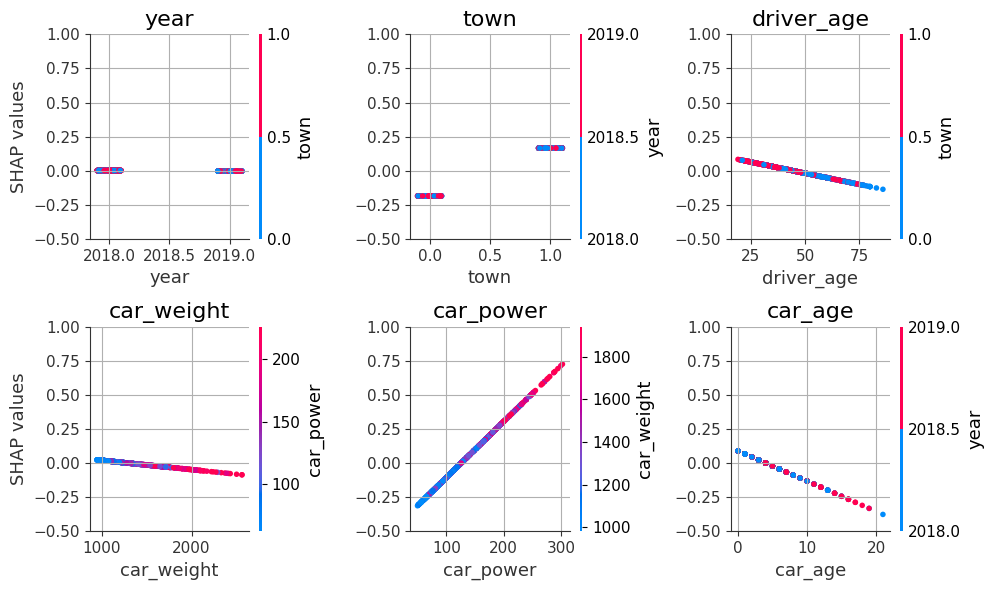

In [22]:
all_dep_plots(x, shap_glm, X_explain)

#### <font color="Coral"><b>Task 4</b></font> &nbsp; How did SHAP do?

In Task 3, you chose two features and examined their effects on the target value, the number of incidents.

Here, revisit those two features, and in a couple of sentences, describe whether the effects you measured match the plots above.

<br>

**Note/Hints**  There are lots of dimensions here! And lots of information! The x-axis of each plot shows the feature values. The y-axis is the SHAP value (the relative impact on the number of claims).

The red/blue coloring of datapoints shows how the _most influential **other** feature_ overlays onto the current plot. That **other** feature is the most influential for the one labeled on the x-axis, and so it will often be different for different plots.  

<br>

As an example of this feature-comparison, remember that one <tt><b>town</b></tt> unit multiplied the claims by 1.4, and the full span of <tt><b>driver_age</b></tt> multiplied the claims by 1.25.

This matches well!  In the above plot, the span for <tt><b>town</b></tt> is a little bit larger than the span for <tt><b>driver_age</b></tt>.

The SHAP units are not the same, and SHAP takes into account more than linear dependencies, but it has captured the sign and the magnitude of the model it was interpreting.
  

<br>
<hr>
<br>

For your two reflections, feel free to use this cell or new ones just below this one:

<br>
<br>

In the previous section I looked at car_age and car_power.

Car power matches because I found that higher power increases chances of accidents and that's what the graph shows too.
Car age also matches because I found that as the age increases the chance of claim decreases which is what the graph here shows.

### Part 4: &nbsp;&nbsp; A Neural Network model

Here, we TensorFlow to fit a "shallow" neural net.

Your task is to improve the results -- by adding more layers and retraining...

Plus, the resulting layered network will be able to extract nonlinear relationships among the features <br> <font size="-1">(in exchange for much more training time...)</font>

Neurons work best when all their data is ***roughly the same magnitude***

Our brains handle this at the sensor level -- our hearing and vision systems continually try to re-establish the ambient baseline to help convert their inputs into computable magnitudes:
+ light sensitivity increases in the dark and decreases in bright light
+ for sound, loud repetitive even soft sounds are heightened when in a quiet place.

<br>

For neural nets, we can scale each feature to be between -1 and 1:

In [23]:
# Scale features to [-1, 1]
from sklearn.preprocessing import MinMaxScaler

nn_preprocessor = MinMaxScaler(feature_range=(-1, 1))
X_train = nn_preprocessor.fit_transform(train[x])

print("Output after the data has been scaled:")
pd.DataFrame(X_train[0:5], columns=x)

Output after the data has been scaled:


,year,town,driver_age,car_weight,car_power,car_age
0,1.0,-1.0,0.246377,-0.530612,-0.501754,-1.000000
1,-1.0,1.0,-0.072464,-0.530612,-0.256140,-0.818182
2,1.0,1.0,-0.072464,-0.969388,-0.817544,-0.636364
3,1.0,1.0,-0.333333,-0.867347,-0.887719,-0.181818
4,1.0,1.0,-0.594203,-0.489796,-0.445614,-0.727273


In [40]:
#
# Neural nets are worthy of their own course, for sure...
#
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
cb = [EarlyStopping(patience=20), ReduceLROnPlateau(patience=5)]  # "callbacks" for training (see below)

# Architecture
inputs = keras.Input(shape=(len(x),))
# additional layers can be added here!
outputs = layers.Dense(1, activation="exponential")(inputs)
nn_model_shallow = keras.Model(inputs=inputs, outputs=outputs)

nn_model_shallow.summary()

# Calculate gradients
nn_model_shallow.compile(optimizer=Adam(learning_rate=1e-4), loss="Poisson")

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

Above, you see the artictecture of the network.

This includes the total number of neuron-connections (parameters) to train.

Let's train!

In [ ]:
#
# train the network!
#

tf.random.set_seed(4349)

history_shallow = nn_model_shallow.fit(
    x=X_train,
    y=train[y],
    epochs=200,
    batch_size=10_000,
    validation_split=0.1,
    callbacks=cb,
    verbose=1,         # consider running both values 0 (no printing) and 1 (printing)
)

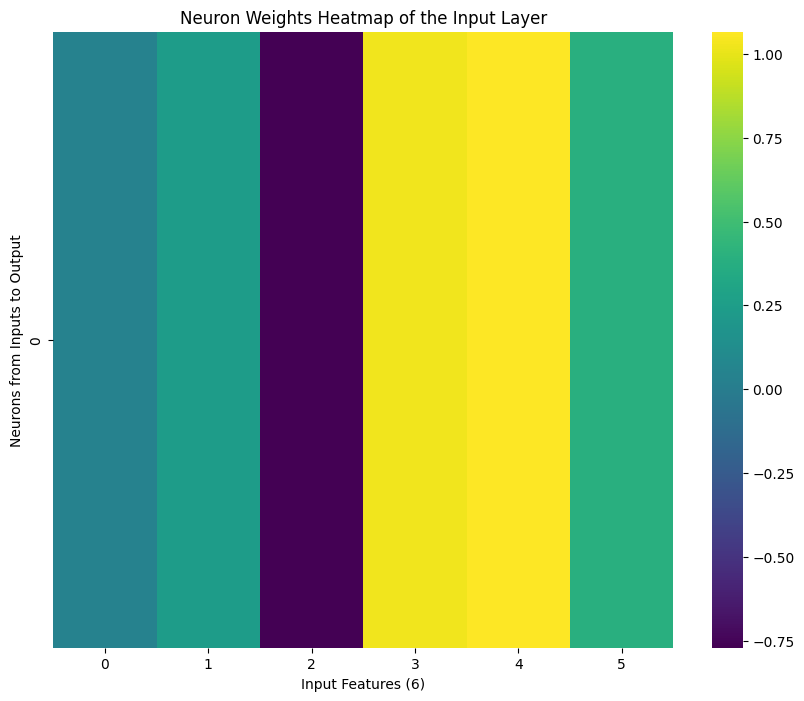

In [42]:
# prompt: Could you show a heatmap of the values of the neuron's weights in the above model, named nn_model?

import seaborn as sns
import matplotlib.pyplot as plt

# Here, nn_model_shallow is the Keras (NNet) model
weights = nn_model_shallow.layers[1].get_weights()[0]  # Get weights from this layer (omitting the intercepts, which are in [1])
weights = np.transpose(weights)

# Create a heatmap of the weights
plt.figure(figsize=(10, 8))
sns.heatmap(weights, annot=False, cmap='viridis')
plt.title("Neuron Weights Heatmap of the Input Layer")
plt.xlabel("Input Features (6)")
plt.ylabel("Neurons from Inputs to Output")
plt.show()

And, let's see how the model does... using `shap`

  0%|          | 0/1000 [00:00<?, ?it/s]

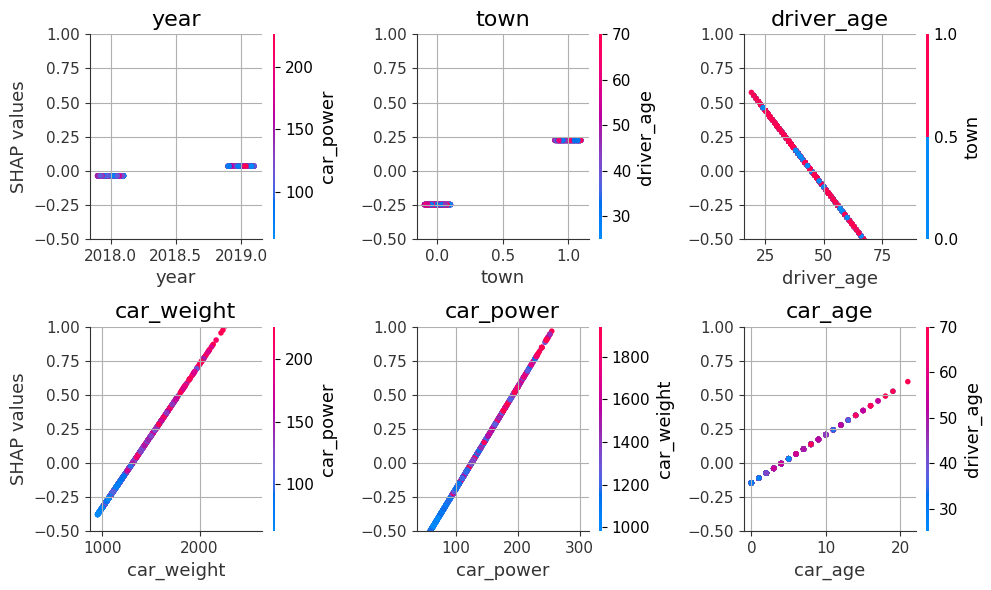

In [43]:
def nn_predict_shallow(X):
    """Prediction function of the neural network (log scale)."""
    df = pd.DataFrame(X, columns=x)
    df_scaled = nn_preprocessor.transform(df)
    pred = nn_model_shallow.predict(df_scaled, verbose=0, batch_size=10_000).flatten()
    return np.log(pred)


nn_explainer = shap.KernelExplainer(nn_predict_shallow, data=X_bg)
shap_nn = nn_explainer.shap_values(X_explain, nsamples=30)

all_dep_plots(x, shap_nn, X_explain)

#### Next, let's add a "hidden" layer to our network...

Here, we add a middle, "hidden," layer to our network in line 14, below. Notice that
+ the value 7 is the number of neurons
+ the inputs from the initial layer are, in fact, the inputs to this middle layer
+ the variable z holds the outputs of this layer.
+ the output layer uses z as its input (and then estimates the goal, the number of claims from there)

Additional layers are able to continue this pattern (one example is commented out on line 17):

In [44]:
#
# Let's add a second layer to our network:

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
cb = [EarlyStopping(patience=20), ReduceLROnPlateau(patience=5)]  # "callbacks" for training (see below)

# Architecture: Adding Layers
inputs = keras.Input(shape=(len(x),))            # Here is the input layer

z = layers.Dense(7, activation="tanh")(inputs)   # Here is the new layer: 7 neurons, inputs are the input, and z is the output. Use "tanh"

# For more layers, you can continue using z.     # Here is a commented-out example:
# z = layers.Dense(3, activation="tanh"))(z)     # This is another layer: 3 neurons, z is the input, and z is the output

outputs = layers.Dense(1, activation="exponential")(z)   # Here, we convert the previous layer's results (z) into the overall output
nn_model_2layer = keras.Model(inputs=inputs, outputs=outputs)   # The final layer often uses a different activation function

nn_model_2layer.summary()

nn_model_2layer.compile(optimizer=Adam(learning_rate=1e-4), loss="Poisson")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              49 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tf.random.set_seed(4349)

history_2layer = nn_model_2layer.fit(
    x=X_train,
    y=train[y],
    epochs=200,
    batch_size=10_000,
    validation_split=0.1,
    callbacks=cb,
    verbose=1,         # consider running both values 0 (no printing) and 1 (printing)
)

Let's see the neurons!

At least as a heatmap of the weights:

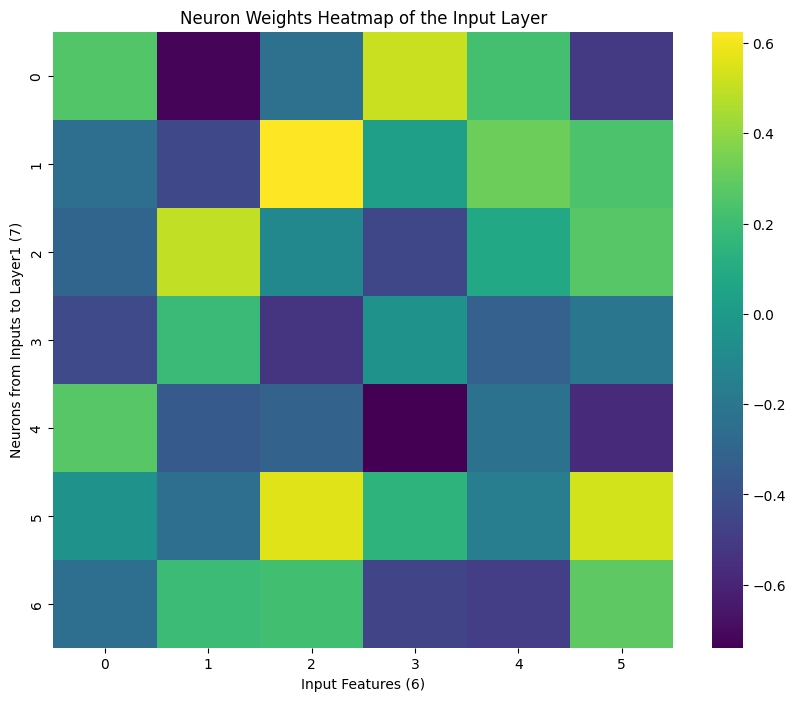

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

weights = nn_model_2layer.layers[1].get_weights()[0]  # Get weights from this layer (omit the intercept, which is [1])
weights = np.transpose(weights)

# Create a heatmap of the weights
plt.figure(figsize=(10, 8))
sns.heatmap(weights, annot=False, cmap='viridis')
plt.title("Neuron Weights Heatmap of the Input Layer")
plt.xlabel(f"Input Features (6)")
plt.ylabel("Neurons from Inputs to Layer1 (7)")
plt.show()


Next layer!

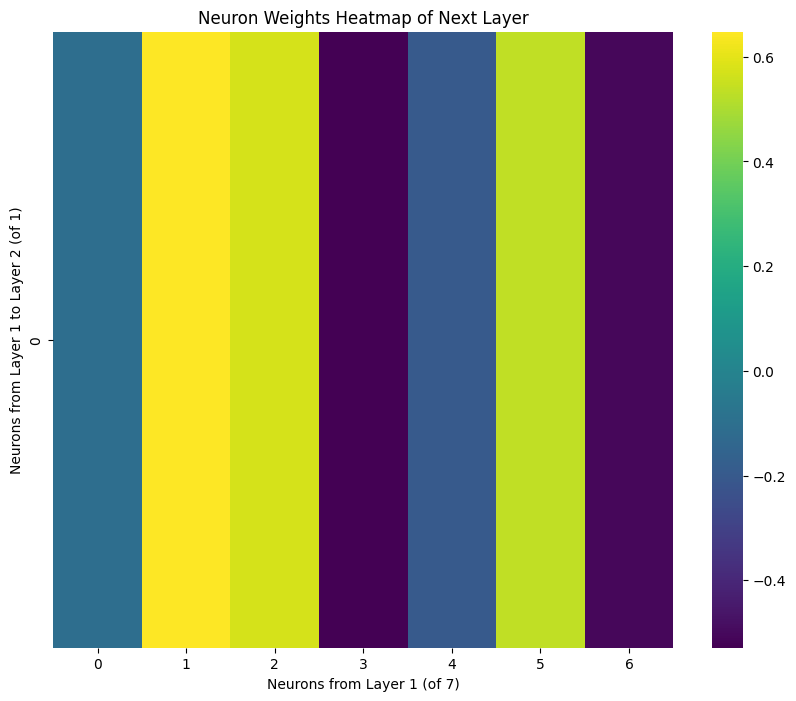

In [47]:
# Next layer
weights = nn_model_2layer.layers[2].get_weights()[0]  # Get weights from this layer (omit the intercept, which is [1])
weights = np.transpose(weights)

# Create a heatmap of the weights
plt.figure(figsize=(10, 8))
sns.heatmap(weights, annot=False, cmap='viridis')
plt.title("Neuron Weights Heatmap of Next Layer")
plt.xlabel("Neurons from Layer 1 (of 7)")
plt.ylabel("Neurons from Layer 1 to Layer 2 (of 1)")
plt.show()


Let's run `shap` to see if it does better...

  0%|          | 0/1000 [00:00<?, ?it/s]

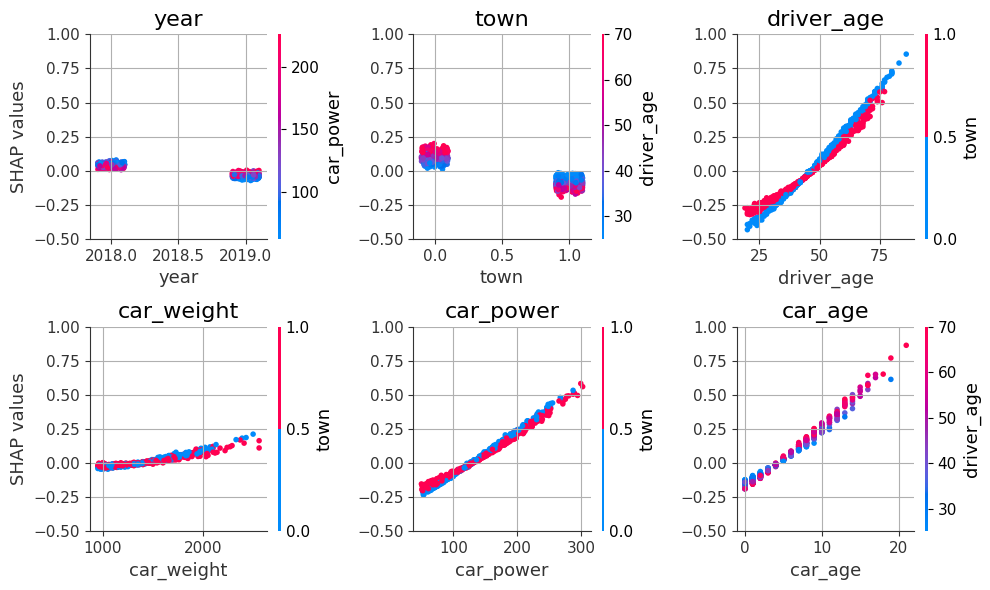

In [48]:
def nn_predict_2layer(X):
    """Prediction function of the neural network (log scale)."""
    df = pd.DataFrame(X, columns=x)
    df_scaled = nn_preprocessor.transform(df)
    pred = nn_model_2layer.predict(df_scaled, verbose=0, batch_size=10_000).flatten()
    return np.log(pred)

nn_explainer = shap.KernelExplainer(nn_predict_2layer, data=X_bg)
shap_nn = nn_explainer.shap_values(X_explain, nsamples=30)

all_dep_plots(x, shap_nn, X_explain)   # create all feature-dependency plots

Notice that these features do not _yet_ match the ones computed by the linear regression model we interpreted above.

Thus far, the NNet is too primitive to be able to learn the real relationships among those dataset features.

<font color="Coral">Your task</font> is to experiment below, in order to create a larger, more faithful NNet model.

### The "Real" data model

Usually datasets do not have a "real" model. At least not one that's known!

This dataset, however, does have a _real_ underlying model! (It was inspired by the real data and then used to generate this dataset.)

Here is the real model:

In [49]:
#
# The age is a much more complicated - non-linear - feature
def age_effect(age):
    x = (age - 66) / 60
    return 0.05 + x**8 + 0.4 * x**3 + 0.3 * x**2 + 0.06 * x

#
# here is the true model for this dataset:
def true_model(X):
    """Returns pd.Series of true expected frequencies."""
    df = pd.DataFrame(X, columns=x)  # Needed because SHAP turns df to np.array
    log_lambda = (
        0.15 * df.town
        + np.log(age_effect(df.driver_age))
        + (0.3 + 0.15 * df.town) * df.car_power / 100
        - 0.02 * df.car_age
    )
    return np.exp(log_lambda)

`shap` is not specific to NNets or linear regression models. It supports the interpretation of _any_ model, including the real one.

Here is `shap`'s interpretation of this real model:

  0%|          | 0/1000 [00:00<?, ?it/s]

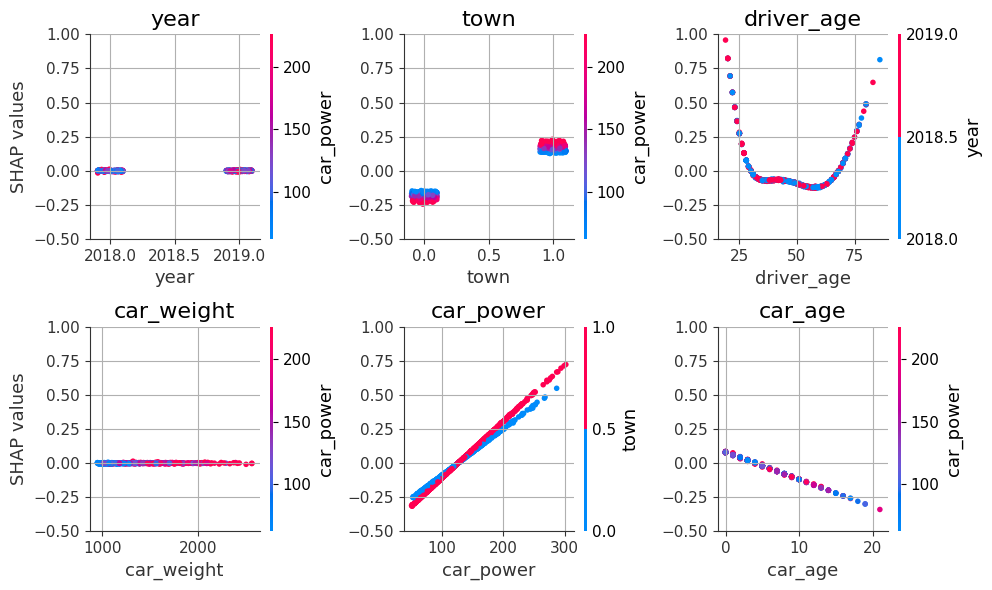

In [50]:
import shap

true_model_explainer = shap.KernelExplainer(lambda x: np.log(true_model(x)), data=X_bg)
shap_true = true_model_explainer.shap_values(X_explain, nsamples=30)

all_dep_plots(x, shap_true, X_explain)

Things to notice:
+ the relationship between driver_age and the number of claims is "highly non-linear!"
+ there are also _two slopes_ for the linear car_power feature (so, officially, it's "not linear")
+ note, too, that car_weight has no impact on the output...
  + Challenge question (not really a hw task): <br>  _**Why** do the modeling techniques above observe an impact of the car_weight feature?_

## Final challenge: <font color="DodgerBlue">_Improve the NNet_</font>

#### <font color="Coral"><b>Task Finale</b></font>

From here, your task is to
+ create a more-capable neural network... with the goal of representing the actual data interactions ***better*** than the linear-regression model
+ consider using more layers (but not too many)
+ consider the "step-down" architecture, where
  + the first post-input layer has the most neurons ("feature building")
  + then, subsequent layers have fewer...
  + tapering into the output layer

You'll find that the NNet won't represent the "real" model perfectly, but it will
+ find its own features
+ represent the non-linear relationship (for driver_age)
+ and, for me, it could _start_ to represent the dependence of car_power on town

<br>



### Use the cells below to experiment with NNet building...

Use the above `2layer` example as a template, and then - below -
+ experiment and create a new model -- and
+ show its `shap` interpretation... -- and
+ be sure to include a <font color="DodgerBlue">3-5 sentence <b>reflection</b> on</font> your experimentation (how long it took!) and how well the resulting NNet does at capturing the feature relationships of the actual, underlying "reality" ...

<br>

Worth remembering:  _We're **all** neural nets!_
+ It would seem we're always "keeping this in mind" 😀

In [42]:
#
# Let's add a second layer to our network:

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
cb = [EarlyStopping(patience=20), ReduceLROnPlateau(patience=5)]  # "callbacks" for training (see below)

# Architecture: Adding Layers
inputs = keras.Input(shape=(len(x),))            # Here is the input layer

z = layers.Dense(120, activation="tanh")(inputs)
z = layers.Dense(60, activation="tanh")(z)
z = layers.Dense(30, activation="tanh")(z)
z = layers.Dense(15, activation="tanh")(z)

outputs = layers.Dense(1, activation="exponential")(z)   # Here, we convert the previous layer's results (z) into the overall output
nn_model_2layer = keras.Model(inputs=inputs, outputs=outputs)   # The final layer often uses a different activation function

nn_model_2layer.summary()

nn_model_2layer.compile(optimizer=Adam(learning_rate=1e-4), loss="Poisson")

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 120)                 │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 60)                  │           7,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,411 (40.67 KB)

 Trainable params: 10,411 (40.67 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
tf.random.set_seed(4349)

history_2layer = nn_model_2layer.fit(
    x=X_train,
    y=train[y],
    epochs=200,
    batch_size=500,
    validation_split=0.1,
    callbacks=cb,
    verbose=0,         # consider running both values 0 (no printing) and 1 (printing)
)

  0%|          | 0/1000 [00:00<?, ?it/s]

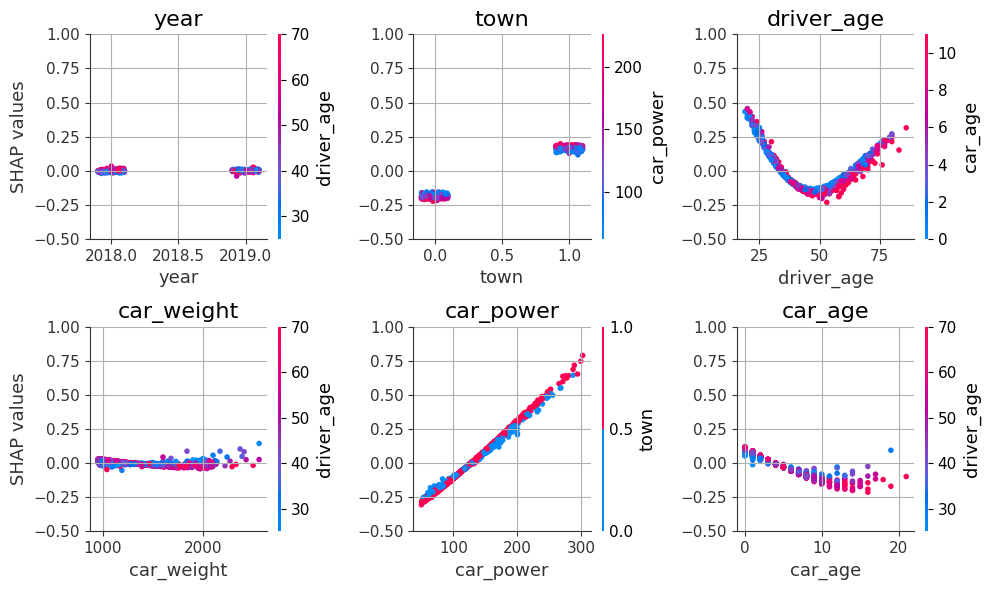

In [44]:
def nn_predict_2layer(X):
    """Prediction function of the neural network (log scale)."""
    df = pd.DataFrame(X, columns=x)
    df_scaled = nn_preprocessor.transform(df)
    pred = nn_model_2layer.predict(df_scaled, verbose=0, batch_size=500).flatten()
    return np.log(pred)

nn_explainer = shap.KernelExplainer(nn_predict_2layer, data=X_bg)
shap_nn = nn_explainer.shap_values(X_explain, nsamples=30)

all_dep_plots(x, shap_nn, X_explain)   # create all feature-dependency plots

I was able to get it pretty close to the "real" model. It took me around an hour playing around with it to get my current results. I tried for a while to do better than what I have but wasn't able to. I think the NNet captures the general trends of relationship such as driver age being a curve and everything else going in the direction it's supposed to.